# Ejercicio 1. Solución Numérica del Pendulo Simple 1D

$La\ ecuación\ del\ pendulo\ simple\ es;\ \ddot{\theta}+\frac{g}{l}sin(\theta)=0,\ si\ se\ hace\ la\ aproximación\ de\ angulos\ pequeños\ se\ tiene\ que\ \theta\to 0\ y\ la\ ecuación\ a\ resolver\ es\ \ddot{\theta}+\frac{g}{l}\theta=0,\ que\ tiene\ la\ solución\ analítica;\ \theta=C_1cos(\omega t)+C_2sin(\omega t),\ donde\ \omega=\frac{g}{l}\\$
$En\ este\ programa\ se\ muestra\ una\ comparativa\ entre\ la\ solución\ numérica\ realizada\ con\ el\ método\ de\ Runge\ Kutta\ a\ cuarto\ orden\ y\ la\ solución\ analítica\$


        

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import timedelta




In [2]:
#parametros del pendulo
g=9.81           #gravedad
l=1              #longitud
w=math.sqrt(g/l)

#tiempo de simulación
n=100            #numero de particiones del intervalo de tiempo a solucionar
ti=0             #tiempo inicial
tf=10           #tiempo final
h=(tf-ti)/n    

#evaluación de condiciones de iniciales para la solución analítica
tpc=1            #tehta_punto_cero (derivada del angulo evaludada en el tiempo cero)
tc=0             #tehta_cero (angulo evaludado en el tiempo cero)
C2=((tpc/w)+(tc*math.sin(math.radians(w*ti)))/math.cos(math.radians(w*ti)))/(math.cos(math.radians(w*ti))-(math.sin(math.radians(w*ti)))/math.cos(math.radians(w*ti)))
C1=(tc-C2*math.sin(math.radians(w*ti)))/math.cos(math.radians(w*ti))

### 1.- Escribe un código simple en python, para resolver la ecuación de movimiento de un péndulo simple utilizando la sintaxis básica, i.e cómo si fuera C/fortran

$En\ esta\ parte\ se\ encuentrará\ la\ solución\ numérica\ y\ analítica\ sin\ usar\ la\ librería\ Numpy$

El tiempo de ejecución de cálculo es de 0.0008530616760253906 seg
El tiempo de ejecución de gráficas es de 0.08458328247070312 seg


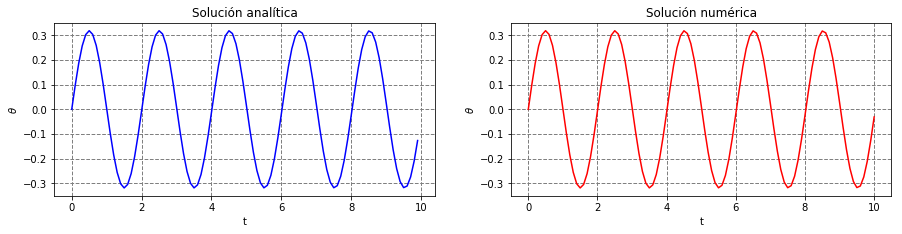

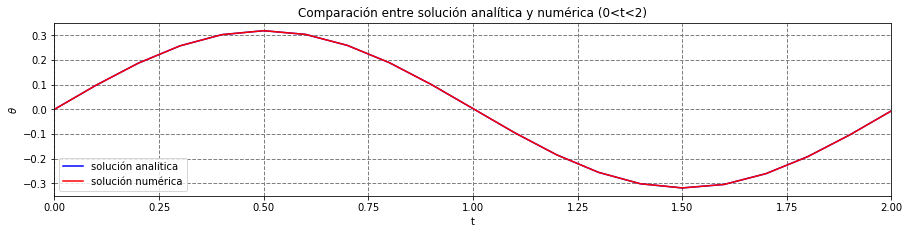

In [3]:
#declaración de listas para almacenar la solución y graficarla

start_time = time.time()

time_vector= list(range(0,n));
time1= list(range(0,n+1));
analitical_solution=list(range(0,n));
tp_evolution_orden4=list(range(0,n+1))
t_evolution_orden4=list(range(0,n+1))
    
t_evolution_orden4[0]=tc
tp_evolution_orden4[0]=tpc

#soloción analítica y solución numérica en el mismo for; aquí se implementa el metodo numérico de Runge-Kuta de 4to orden y
#la evalución en el tiempo de la solución analítica.
#la función (ecuación diferencial) ya ha sido sustituida al obtener los parámetros k's y l's
for i in range(0,len(time_vector)):
   time_vector[i]= time_vector[i]*h
   time1[i+1]=time1[i+1]*h
   analitical_solution[i]=C1*math.cos((w*time_vector[i]))+C2*math.sin((w*time_vector[i])) #evaluación de la solución analitica
   k1=h*tp_evolution_orden4[i]           
   l1=h*(-(g/l)*t_evolution_orden4[i])  
   k2=h*(tp_evolution_orden4[i]+l1/2)      
   l2=h*(-(g/l)*(t_evolution_orden4[i]+k1/2))   
   k3=h*(tp_evolution_orden4[i]+l2/2)      
   l3=h*(-(g/l)*(t_evolution_orden4[i]+k2/2))
   k4=h*(tp_evolution_orden4[i]+l3)      
   l4=h*(-(g/l)*(t_evolution_orden4[i]+k3))
   t_evolution_orden4[i+1]=(t_evolution_orden4[i]+(1/6)*(k1+2*k2+2*k3+k4))
   tp_evolution_orden4[i+1]=tp_evolution_orden4[i]+(1/6)*(l1+2*l2+2*l3+l4)

elapsed_time_secs = time.time() - start_time
print("El tiempo de ejecución de cálculo es de",elapsed_time_secs, "seg")

start_timeG = time.time()
#grafica por separado de las soluciones
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.plot(time_vector,analitical_solution, color='blue')
plt.title("Solución analítica")
plt.xlabel("t")              
plt.ylabel(r"$\theta$")               
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

plt.subplot(2,2,2)
plt.plot(time1,t_evolution_orden4, color='red')
plt.title("Solución numérica")
plt.xlabel("t")              
plt.ylabel(r"$\theta$") 
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

#solución en la misma grafica (comparacion de solución numerica y anañítica)
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
plt.plot(time_vector,analitical_solution, color='blue', label="solución analitica")
plt.plot(time1,t_evolution_orden4, color='red', label="solución numérica")
plt.xlim(0, 2)
plt.title("Comparación entre solución analítica y numérica (0<t<2)")
plt.xlabel("t")              
plt.ylabel(r"$\theta$") 
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.legend(loc='lower left')

elapsed_time_secsG = time.time() - start_timeG
print("El tiempo de ejecución de gráficas es de",elapsed_time_secsG, "seg")




$Las\ gráficas\ que\ se\ muestran\ son\ de\ la\ solución\ analitica\ y\ numerica\ por\ separado\ y\ en\ la\ ultima\ grafica\ se\ muestran\ en\ la\ misma,\ donde\ es\ claro\ ver\ que\ estan\ empalmadas\ lo\ cual\ indíca\ la\ presición\ del\ método\ de\ Runge\ Kutta\ 4to\ orden$

### 2.- Reescribe dicho código aprovechando el manejo de arreglos de numpy.

$En\ esta\ parte\ se\ encontrará\ la\ misma\ solución\ que\ la\ parte\ anterior\ pero\ usando\ la\ librería\ Numpy\ para\ definición\ de\ arreglos\ y\ tambien\ se\ usará\ una\ función\ para\ cuando\ se\ evaluen\ los\ K's\ y\ L's\$

El tiempo de ejecución es de 0.006269931793212891 seg
El tiempo de ejecución de gráficas es de 0.06220078468322754 seg


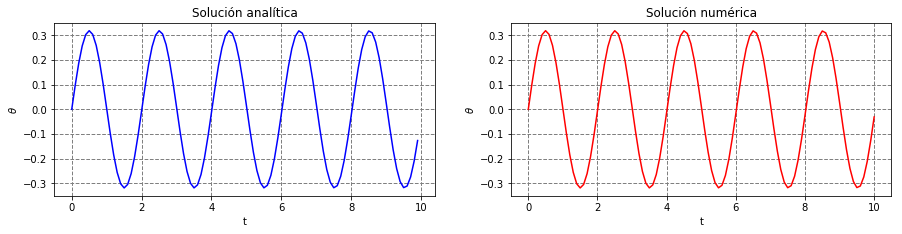

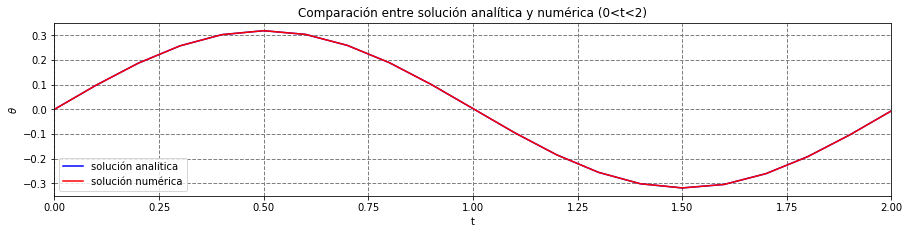

In [4]:
#declaración de arreglos para almacenar la solución y graficarla
start_time2 = time.time()
time_vector= np.zeros(n, dtype=float);
time1= np.zeros(n+1, dtype=float);
analitical_solution=np.zeros(n, dtype=float);
tp_evolution_orden4=np.zeros(n+1, dtype=float);
t_evolution_orden4=np.zeros(n+1, dtype=float);
    
t_evolution_orden4[0]=tc
tp_evolution_orden4[0]=tpc

#Aquí se implementa el metodo numérico de Runge-Kuta de 4to orden y la evalución en el tiempo de la solución analítica.
#se declara tambien las funciones kf y lf que evaluan los valores de k's y l's. Es posible introducir cualquier ecuacion
#diferencial de 2do orden y resolverla simplemente al sustituir los valores de 0's en el Return de la función lf

def lf(t, theta_p, theta):
    return (h*(0*(t)+0*(theta_p)-1*(theta*g/l)))
def kf(theta_p):
    return (h*theta_p)

for i in range(0,len(time_vector)):
   time_vector[i]= i*h
   time1[i+1]=(i+1)*h
   analitical_solution[i]=C1*math.cos((w*time_vector[i]))+C2*math.sin((w*time_vector[i]))
   k1=kf(tp_evolution_orden4[i])  
   l1=lf(time1[i],tp_evolution_orden4[i],t_evolution_orden4[i])   
   k2=kf(tp_evolution_orden4[i]+l1/2)  
   l2=lf(time1[i]+h/2,tp_evolution_orden4[i]+l1/2,t_evolution_orden4[i]+k1/2)
   k3=kf(tp_evolution_orden4[i]+l2/2)  
   l3=lf(time1[i]+h/2,tp_evolution_orden4[i]+l2/2,t_evolution_orden4[i]+k2/2)
   k4=kf(tp_evolution_orden4[i]+l3)  
   l4=lf(time1[i]+h,tp_evolution_orden4[i]+l3,t_evolution_orden4[i]+k3)
   t_evolution_orden4[i+1]=(t_evolution_orden4[i]+(1/6)*(k1+2*k2+2*k3+k4))
   tp_evolution_orden4[i+1]=tp_evolution_orden4[i]+(1/6)*(l1+2*l2+2*l3+l4)

elapsed_time_secs2 = time.time() - start_time2
print("El tiempo de ejecución es de",elapsed_time_secs2, "seg")

start_time2G = time.time()

#grafica por separado de las soluciones
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.plot(time_vector,analitical_solution, color='blue')
plt.title("Solución analítica")
plt.xlabel("t")              
plt.ylabel(r"$\theta$")               
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

plt.subplot(2,2,2)
plt.plot(time1,t_evolution_orden4, color='red')
plt.title("Solución numérica")
plt.xlabel("t")              
plt.ylabel(r"$\theta$") 
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)

#solución en la misma grafica (comparacion de solución numerica y anañítica)
plt.figure(figsize=(15,7))
plt.subplot(2,1,2)
plt.plot(time_vector,analitical_solution, color='blue', label="solución analitica")
plt.plot(time1,t_evolution_orden4, color='red', label="solución numérica")
plt.xlim(0, 2)
plt.title("Comparación entre solución analítica y numérica (0<t<2)")
plt.xlabel("t")              
plt.ylabel(r"$\theta$") 
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.legend(loc='lower left')

elapsed_time_secs2G = time.time() - start_time2G
print("El tiempo de ejecución de gráficas es de",elapsed_time_secs2G, "seg")





### 3.- En ambos casos muestra tus resultados usando tablas y gráficos. Compara los resultados, en terminos de los tiempos de ejecución. Puedes elegir libremente los parámetros para el péndulo.

$Ya\ se\ han\ mostrado\ las\ graficas\ de\ las\ soluciones\ tanto\ analitica\ como\ numérica.\ El\ tiempo\ de\  ejecución\ tambien\ fue\ calculado\ en\ cada\ parte\ correspondiente\ del\ programa,\ a\ continuación\ se\ muestra\ una\ conclución\ sobre\ los\ tiempos\ de\ ejecución$

In [5]:
T_relation=elapsed_time_secs2/elapsed_time_secs

In [6]:
T_relationG=elapsed_time_secs2G/elapsed_time_secsG

In [7]:
print("las relaciones de tiempo varian en cada ejecucion, pero aproximadamente es el timpo de ejecución usando litas (hacerlo estilo C/Fortran) es", T_relation, "veces el tiempo de usar arreglos de numpy") 

las relaciones de tiempo varian en cada ejecucion, pero aproximadamente es el timpo de ejecución usando litas (hacerlo estilo C/Fortran) es 7.349916154276132 veces el tiempo de usar arreglos de numpy


In [8]:
print("la relación para la realización de graficos usando listas es aproximadamente", T_relationG, "veces el tiempo de usar arreglos de numpy") 

la relación para la realización de graficos usando listas es aproximadamente 0.735379177377892 veces el tiempo de usar arreglos de numpy
